<ipython-input-3-265a1c6c411b>:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MSE += float(0.5 * (error) ** 2)
<ipython-input-3-265a1c6c411b>:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  MAPE += float(np.abs(error / (target + 1e-8))) * 100


MSE and MAPE at epoch  0  : 0.4846188246721242  , 485.7605998568005
MSE and MAPE at epoch  5  : 0.004445642762147221  , 20.047831315339565
MSE and MAPE at epoch  10  : 0.0022198874909426535  , 27.55468731056071
MSE and MAPE at epoch  15  : 0.0020262991027299687  , 30.57036335097433
MSE and MAPE at epoch  20  : 0.001915409697194898  , 31.00096983996213
MSE and MAPE at epoch  25  : 0.0018197715852883776  , 30.70412461602088
MSE and MAPE at epoch  30  : 0.0017326411942477477  , 30.194961351443006
MSE and MAPE at epoch  35  : 0.0016525674695794794  , 29.629820264908894
MSE and MAPE at epoch  40  : 0.0015787168422609849  , 29.058591773342627
MSE and MAPE at epoch  45  : 0.0015104054701377317  , 28.49698049762246
MSE and MAPE at epoch  49  : 0.0014593437924954713  , 28.057869902699963


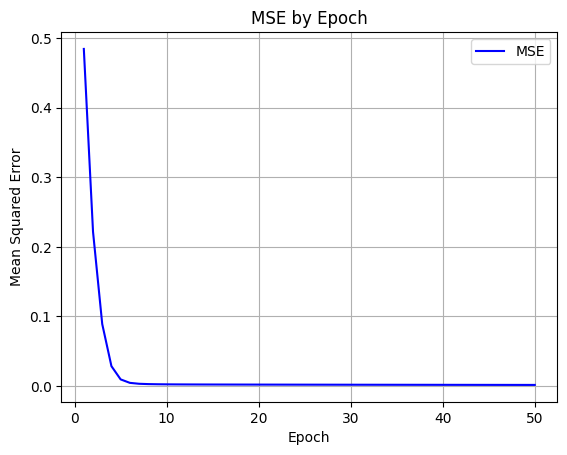

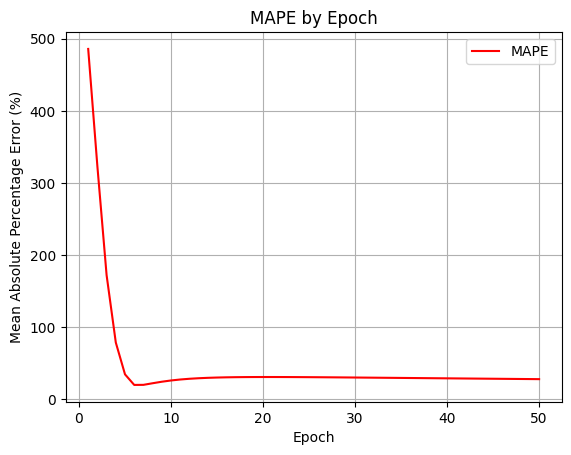

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid 함수 및 미분 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Generating dataset for regression
np.random.seed(0)
samples = 1000

# Features
x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)

# Combine the features into a NumPy array
Input = np.column_stack((x1, x2))

# Target
y = 2 * x1 + 3 * x2 - 1
y = y.reshape(-1, 1)

# Network parameters
input_layer_size = 2
hidden_layer_size = 3
output_layer_size = 1

# Initialize weights and biases
np.random.seed(1)
W1 = np.random.randn(hidden_layer_size, input_layer_size)
b1 = np.random.randn(hidden_layer_size, 1)
W2 = np.random.randn(output_layer_size, hidden_layer_size)
b2 = np.random.randn(output_layer_size, 1)

alpha = 0.01
epochs = 50

# Lists to store the loss
MSE_list, MAPE_list = [], []

for epoch in range(epochs):
    MSE, MAPE = 0, 0
    for i in range(samples):
        X = Input[i].reshape(-1, 1)
        target = y[i]

        # Forward pass
        Z1_tilde = np.dot(W1, X) + b1
        Z1 = sigmoid(Z1_tilde)
        y_pred = np.dot(W2, Z1) + b2

        # Loss accumulation
        error = y_pred - target
        MSE += float(0.5 * (error) ** 2)
        MAPE += float(np.abs(error / (target + 1e-8))) * 100

        # Backpropagation
        dJdY = error  # (1, 1)
        dJdW2 = dJdY * Z1.T  # (1, hidden)
        dJdb2 = dJdY

        dJdZ1 = np.dot(W2.T, dJdY) * sigmoid_derivative(Z1_tilde)
        dJdW1 = np.dot(dJdZ1, X.T)  # (hidden, input)
        dJdb1 = dJdZ1

        # Update weights and biases
        W2 -= alpha * dJdW2
        b2 -= alpha * dJdb2
        W1 -= alpha * dJdW1
        b1 -= alpha * dJdb1

    # Epoch 평균 저장
    MSE /= samples
    MAPE /= samples
    MSE_list.append(MSE)
    MAPE_list.append(MAPE)

    if epoch % 5 == 0 or epoch == epochs - 1:
        print('MSE and MAPE at epoch ', epoch, ' :', np.squeeze(MSE), ' ,', np.squeeze(MAPE))


# Plot MSE
plt.figure()
plt.plot(np.arange(1, epochs + 1), MSE_list, label='MSE', linewidth=1.5, color='b')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot MAPE
plt.figure()
plt.plot(np.arange(1, epochs + 1), MAPE_list, label='MAPE', linewidth=1.5, color='r')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Percentage Error (%)')
plt.title('MAPE by Epoch')
plt.legend()
plt.grid(True)
plt.show()
